In [0]:
import os
import numpy as np

## Mount Google Drive 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Define train Directory 

In [0]:
train_dir = os.path.join('/content/drive/My Drive/Assignment_1/Image_2/Input/Dataset/train')

## Model Building


In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    #tf.keras.layers.BatchNormalization(),# Input shape is size of the image 256x256 with 3 channel
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    
    # Flatten the results of MaxPooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') # 4 output neuron.
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 123, 123, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 59, 59, 128)       73856     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 57, 57, 128)      

Compiling model with loss function *categorical_crossentropy* and adam optimizer.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

##Data Preprocessing

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # Training Directory
        target_size=(256, 256),  # Image size 256 x 256
        batch_size=32,
        class_mode='categorical')

Found 440 images belonging to 4 classes.


## Training

In [0]:
## Train Model 20 epochs
epochs = 20

history = model.fit_generator(
      train_generator,
      steps_per_epoch = 8,
      epochs=epochs,
      verbose=1)

Epoch 1/20
8/8 [==============================] - 6s 803ms/step - loss: 0.9959 - acc: 0.5938
Epoch 2/20
8/8 [==============================] - 2s 283ms/step - loss: 0.5625 - acc: 0.7782
Epoch 3/20
8/8 [==============================] - 4s 451ms/step - loss: 0.2844 - acc: 0.9153
Epoch 4/20
8/8 [==============================] - 4s 466ms/step - loss: 0.2232 - acc: 0.9297
Epoch 5/20
8/8 [==============================] - 4s 458ms/step - loss: 0.1209 - acc: 0.9648
Epoch 6/20
8/8 [==============================] - 4s 454ms/step - loss: 0.0476 - acc: 0.9879
Epoch 7/20
8/8 [==============================] - 4s 445ms/step - loss: 0.0386 - acc: 0.9879
Epoch 8/20
8/8 [==============================] - 4s 446ms/step - loss: 0.0284 - acc: 0.9919
Epoch 9/20
8/8 [==============================] - 4s 473ms/step - loss: 0.0138 - acc: 0.9961
Epoch 10/20
8/8 [==============================] - 4s 457ms/step - loss: 0.0057 - acc: 1.0000
Epoch 11/20
8/8 [==============================] - 4s 446ms/step - lo

## Visualize Training/Validation Loss/Accuracy

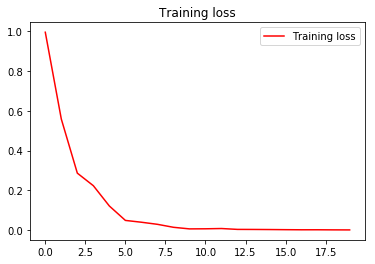

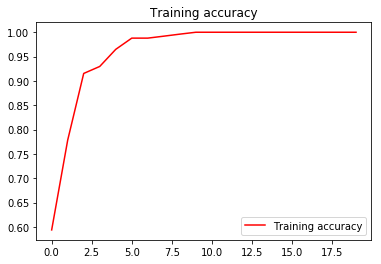

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.show()

## Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow to read files from test directory, and run them through the model, giving an indication of category.

[[1. 0. 0. 0.]]
[0]


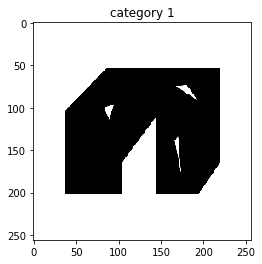

[[0. 0. 1. 0.]]
[2]


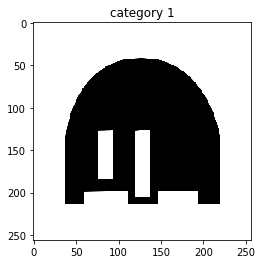

[[0. 1. 0. 0.]]
[1]


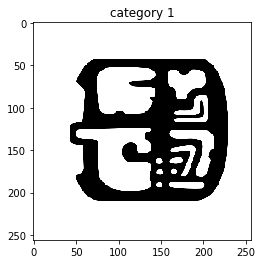

[[0. 0. 1. 0.]]
[2]


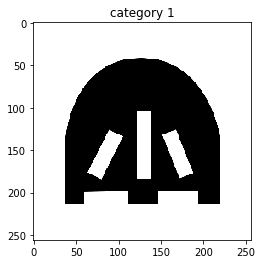

[[1. 0. 0. 0.]]
[0]


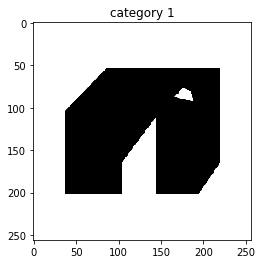

[[0. 0. 1. 0.]]
[2]


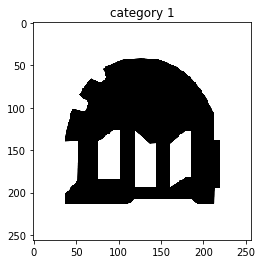

[[0. 1. 0. 0.]]
[1]


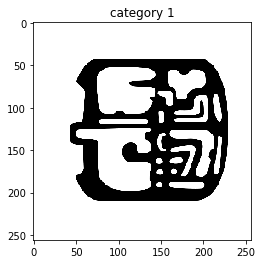

[[0. 0. 0. 1.]]
[3]


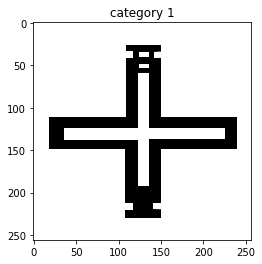

[[0. 0. 1. 0.]]
[2]


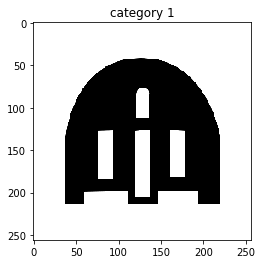

[[0. 0. 0. 1.]]
[3]


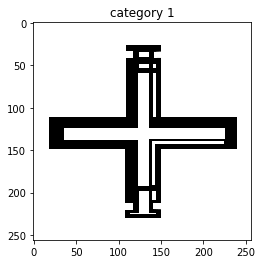

[[1.000000e+00 0.000000e+00 1.802505e-20 0.000000e+00]]
[0]


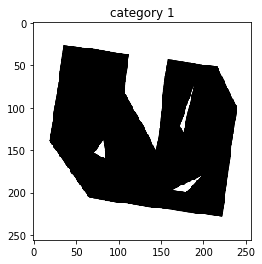

[[0. 0. 1. 0.]]
[2]


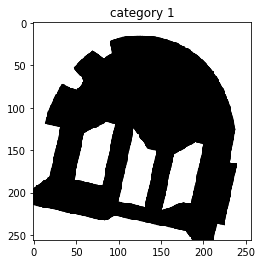

[[0. 0. 1. 0.]]
[2]


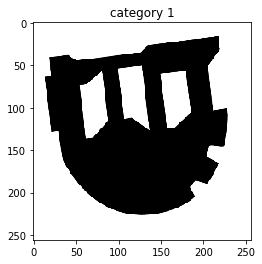

[[1. 0. 0. 0.]]
[0]


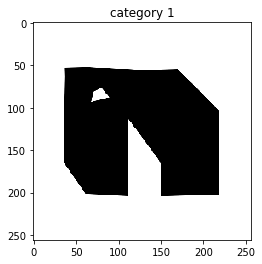

[[1. 0. 0. 0.]]
[0]


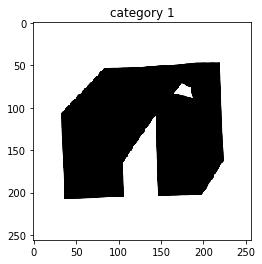

[[0. 0. 1. 0.]]
[2]


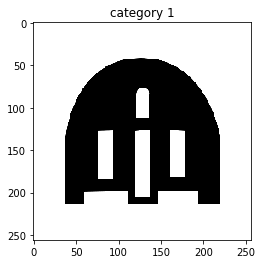

[[0. 0. 1. 0.]]
[2]


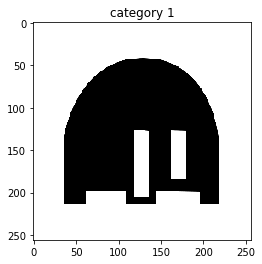

[[0. 0. 1. 0.]]
[2]


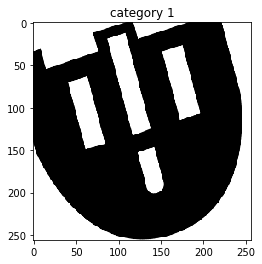

[[0. 0. 1. 0.]]
[2]


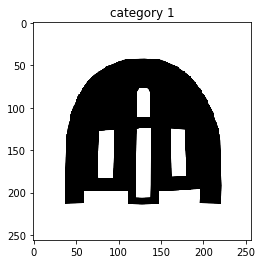

[[0. 1. 0. 0.]]
[1]


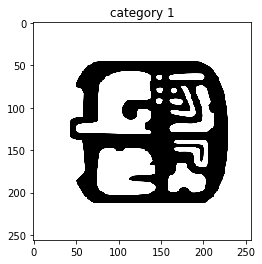

[[0. 1. 0. 0.]]
[1]


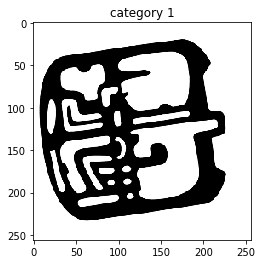

[[0. 0. 1. 0.]]
[2]


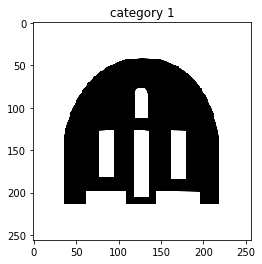

[[0. 1. 0. 0.]]
[1]


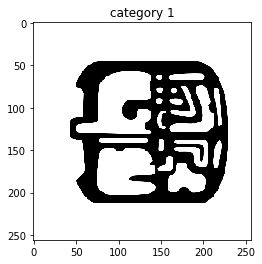

[[0. 1. 0. 0.]]
[1]


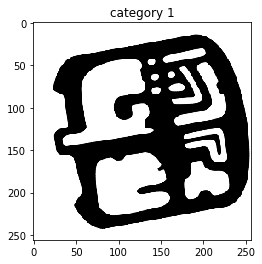

[[0. 1. 0. 0.]]
[1]


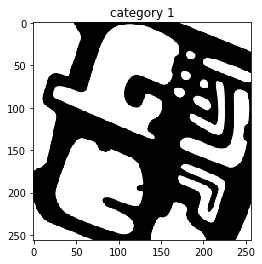

[[0. 1. 0. 0.]]
[1]


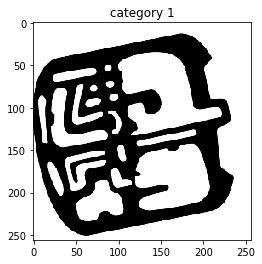

[[0. 0. 0. 1.]]
[3]


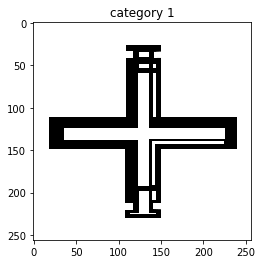

[[0. 0. 0. 1.]]
[3]


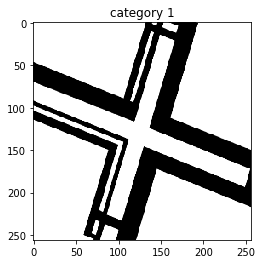

[[0. 0. 0. 1.]]
[3]


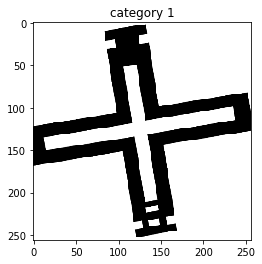

[[0. 1. 0. 0.]]
[1]


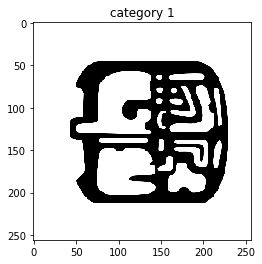

In [0]:
from keras.preprocessing.image import load_img, img_to_array
test_dir = os.path.join('/content/drive/My Drive/Assignment_1/Image_2/Input/Dataset/test')
categories = ['category 1', 'category 2', 'category 3', 'category 4']
test_imgs = os.listdir(test_dir)
for fn in test_imgs:
  if fn == '.DS_Store':
    continue
  # predicting images
  path = os.path.join(test_dir, fn)
  img = load_img(path, target_size=(256, 256))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  plt.imshow(img)
  print(classes)
  print(np.argmax(classes,axis=1))
  plt.title(categories[np.argmax(classes,axis=0)[0]])
  plt.show()
  